In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc
from solver import solver, energy_conservation
from collisions import test_function, scattering, s_annihilation, p_annihilation, annihilation_scattering
from IntegralCheck import Lambda, collision_1D, collision_2D, collision_3D

In [11]:
# Sanity checks for the integrals
p1 = 5
t = 5
ps = np.linspace(1,50,100)


integrands = np.empty(len(ps))
for i in range(len(ps)):
    p3 = ps[i]
    integrands[i] = collision_1D(t,p1,p3,Lambda)
integral = sc.trapezoid(integrands,ps)
print("1D integral = ",integral)


integrand_1D = np.empty(len(ps))
for i in range(len(ps)):
    integrand_2D = np.empty(len(ps))
    p3 = ps[i]
    for j in range(len(ps)):
        p2 = ps[j]
        integrand_2D[j] = collision_2D(t,p1,p2,p3,Lambda)
    integrand_1D[i] = sc.trapezoid(integrand_2D)
integral = sc.trapezoid(integrand_1D,ps)
print("2D integral = ",integral)



1D integral =  12.554009839941903
2D integral =  0.0029621594770791186


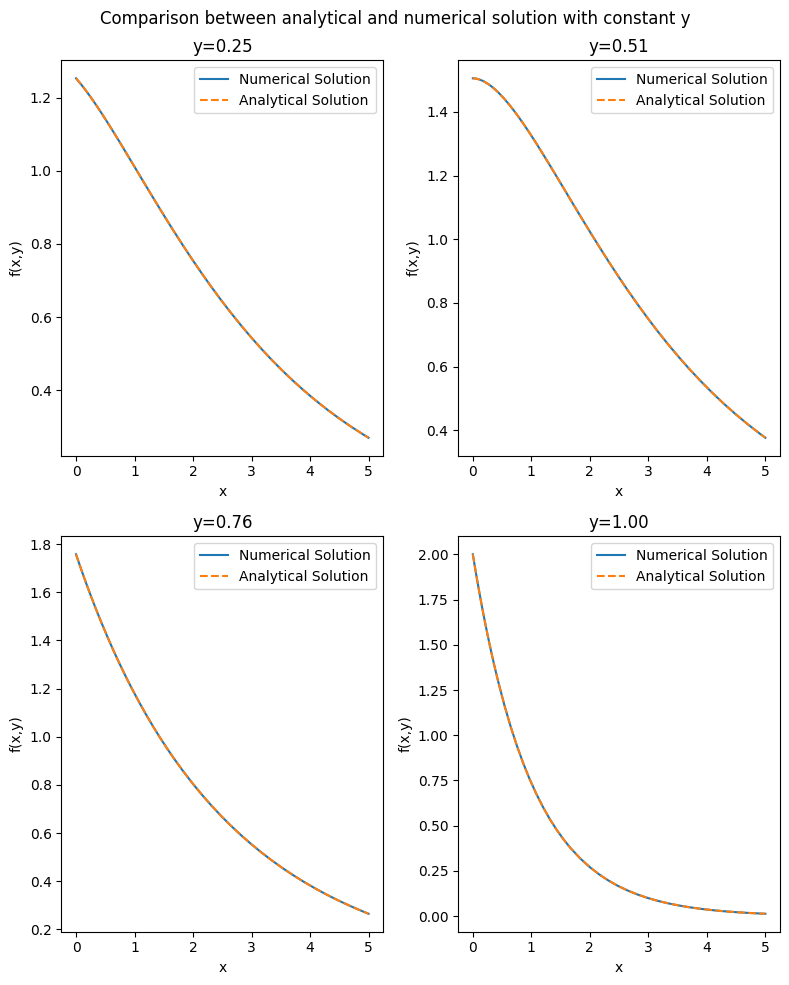

In [12]:
# test the numerical integrator
def f0(y,x):
    return 1 + y
def solution(y,x):
    return np.exp(-x) * (1 + y) + np.sin(np.pi * y) * 1.5 / (2/np.pi) * (np.exp((2/np.pi - 1)*x) - np.exp(-x))

x_span = (0,5)
y_span = (0,1,100)

solv = solver(x_span,y_span,f0,test_function)
xs = solv[0]
ys = solv[1]    
fs = solv[2]

# print(len(ys))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))

n = 25
sol00 = [solution(ys[n],x) for x in xs]
axs[0,0].plot(xs,fs[n,:], label="Numerical Solution")
axs[0,0].plot(xs,sol00,ls="dashed", label="Analytical Solution")
axs[0,0].set_xlabel("x")
axs[0,0].set_ylabel("f(x,y)")
axs[0,0].set_title(f"y={ys[n]:0.2f}")
axs[0,0].legend()

n = 50
sol01 = [solution(ys[n],x) for x in xs]
axs[0,1].plot(xs,fs[n,:], label="Numerical Solution")
axs[0,1].plot(xs,sol01,ls="dashed", label="Analytical Solution")
axs[0,1].set_xlabel("x")
axs[0,1].set_ylabel("f(x,y)")
axs[0,1].set_title(f"y={ys[n]:0.2f}")
axs[0,1].legend()

n = 75
sol10 = [solution(ys[n],x) for x in xs]
axs[1,0].plot(xs,fs[n,:], label="Numerical Solution")
axs[1,0].plot(xs,sol10,ls="dashed", label="Analytical Solution")
axs[1,0].set_xlabel("x")
axs[1,0].set_ylabel("f(x,y)")
axs[1,0].set_title(f"y={ys[n]:0.2f}")
axs[1,0].legend()

n = -1
sol11 = [solution(ys[n],x) for x in xs]
axs[1,1].plot(xs,fs[n,:], label="Numerical Solution")
axs[1,1].plot(xs,sol11,ls="dashed", label="Analytical Solution")
axs[1,1].set_xlabel("x")
axs[1,1].set_ylabel("f(x,y)")
axs[1,1].set_title(f"y={ys[n]:0.2f}")
axs[1,1].legend()

plt.suptitle("Comparison between analytical and numerical solution with constant y")
fig.tight_layout()

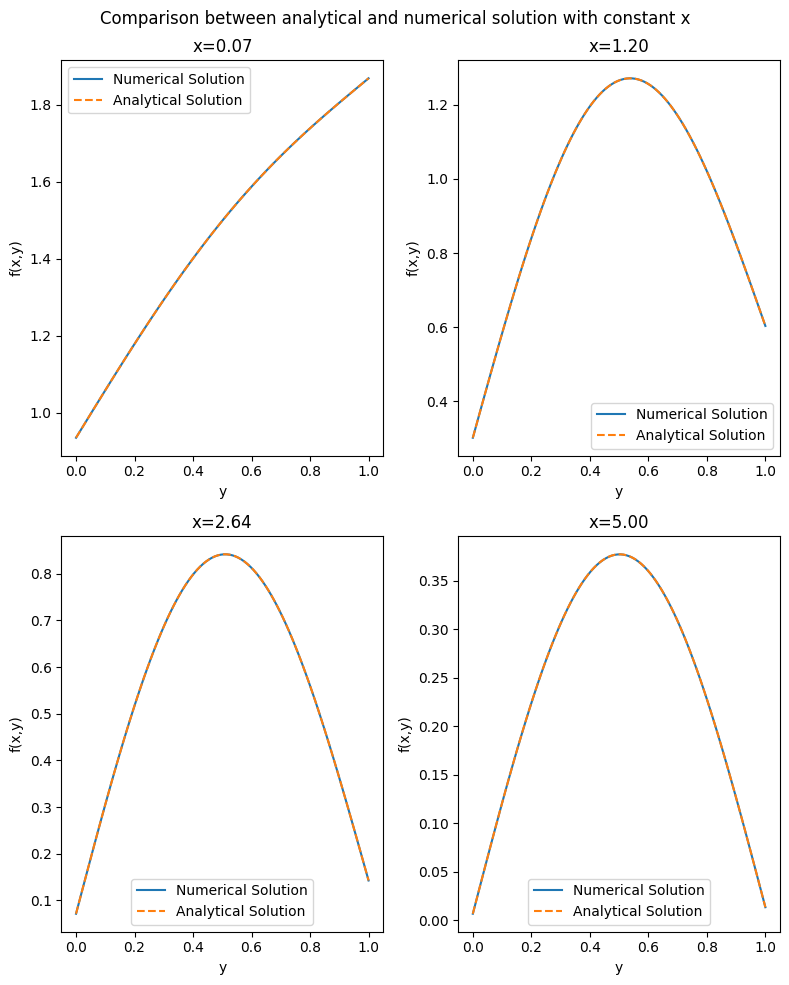

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))

n = 10
sol00 = [solution(y,xs[n]) for y in ys]
axs[0,0].plot(ys,fs[:,n], label="Numerical Solution")
axs[0,0].plot(ys,sol00,ls="dashed", label="Analytical Solution")
axs[0,0].set_xlabel("y")
axs[0,0].set_ylabel("f(x,y)")
axs[0,0].set_title(f"x={xs[n]:0.2f}")
axs[0,0].legend()

n = 25
sol01 = [solution(y,xs[n]) for y in ys]
axs[0,1].plot(ys,fs[:,n], label="Numerical Solution")
axs[0,1].plot(ys,sol01,ls="dashed", label="Analytical Solution")
axs[0,1].set_xlabel("y")
axs[0,1].set_ylabel("f(x,y)")
axs[0,1].set_title(f"x={xs[n]:0.2f}")
axs[0,1].legend()

n = 35
sol10 = [solution(y,xs[n]) for y in ys]
axs[1,0].plot(ys,fs[:,n], label="Numerical Solution")
axs[1,0].plot(ys,sol10,ls="dashed", label="Analytical Solution")
axs[1,0].set_xlabel("y")
axs[1,0].set_ylabel("f(x,y)")
axs[1,0].set_title(f"x={xs[n]:0.2f}")
axs[1,0].legend()

n = -1
sol11 = [solution(y,xs[n]) for y in ys]
axs[1,1].plot(ys,fs[:,n], label="Numerical Solution")
axs[1,1].plot(ys,sol11,ls="dashed", label="Analytical Solution")
axs[1,1].set_xlabel("y")
axs[1,1].set_ylabel("f(x,y)")
axs[1,1].set_title(f"x={xs[n]:0.2f}")
axs[1,1].legend()

plt.suptitle("Comparison between analytical and numerical solution with constant x")
fig.tight_layout()

In [14]:
# initial values and grid
def equilibrium(y,x):
    return np.exp(-np.sqrt(x*x+y*y)) # full thermal equilibrium = e^(-E/T)

def random_distribution(y,x):
    return np.random.random() # generates a random float between 0.0 and 1.0


# grid size  
x_start, x_end = 0.01, 50
y_start, y_end = 0.01, 50
y_gridpoints = 100


x_span = (x_start, x_end)
y_span = (y_start, y_end, y_gridpoints)

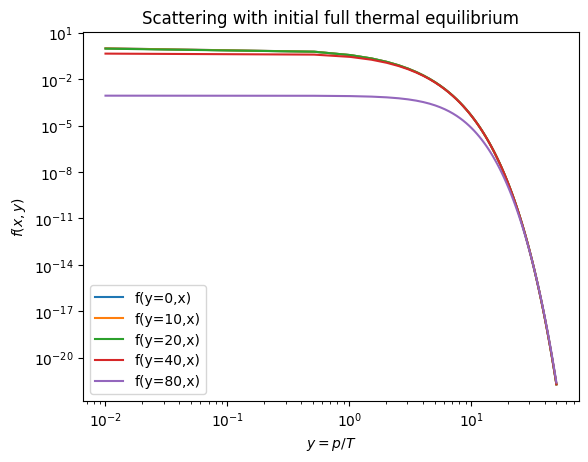

In [15]:
# solve for scattering with initial condition = full thermal equilibrium 
solv = solver(x_span,y_span,equilibrium,scattering)
xs = solv[0]
ys = solv[1]    
fs = solv[2]

for n in [0,10,20,40,80]:
    plt.loglog(ys,fs[:,n],label=f"f(y={n},x)")
plt.xlabel(r"$y = p/T$")
plt.ylabel (r"$f(x,y)$")
plt.title("Scattering with initial full thermal equilibrium")
plt.legend()

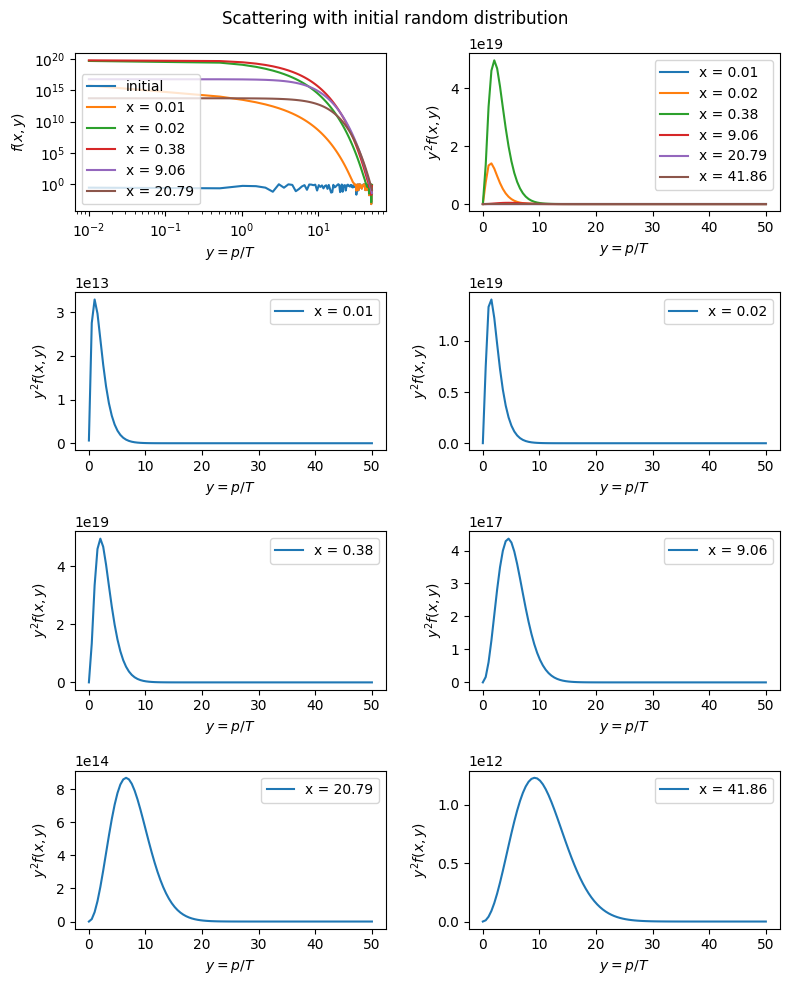

In [16]:
# solve for scattering with initial condition = random distribution
solv = solver(x_span,y_span,random_distribution,scattering)
xs = solv[0]
ys = solv[1]    
fs = solv[2]
# print(len(xs))

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
axs[0,0].loglog(ys,fs[:,0], label= "initial")
for n in [20,100,160,250,320]:
    axs[0,0].loglog(ys,fs[:,n], label= f"x = {xs[n]:0.2f}")
axs[0,0].set_xlabel(r"$y = p/T$")
axs[0,0].set_ylabel (r"$f(x,y)$")
axs[0,0].legend()

for n in [20,100,160,250,320,400]:
    yyfs = [ys[i] * ys[i] * fs[i][n] for i in range(len(ys))]
    axs[0,1].plot(ys,yyfs, label= f"x = {xs[n]:0.2f}")
axs[0,1].set_xlabel(r"$y = p/T$")
axs[0,1].set_ylabel (r"$y^2f(x,y)$")
axs[0,1].legend()


indicies = [[20,100],[160,250],[320,400]]

for i in range(1,4):
    for j in range(0,2):
        index = indicies[i-1][j]
        yyfs = [ys[k] * ys[k] * fs[k][index] for k in range(len(ys))]
        axs[i,j].plot(ys,yyfs, label= f"x = {xs[index]:0.2f}")
        axs[i,j].set_xlabel(r"$y = p/T$")
        axs[i,j].set_ylabel (r"$y^2f(x,y)$")
        axs[i,j].legend()

plt.suptitle("Scattering with initial random distribution")
fig.tight_layout()

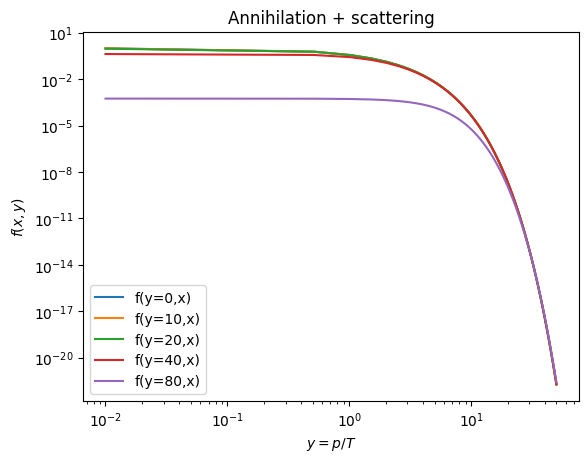

In [17]:
# solve for annihilation and scattering with initial full thermal equilibrium
solv = solver(x_span,y_span,equilibrium,annihilation_scattering)
xs = solv[0]
ys = solv[1]    
fs = solv[2]

for n in [0,10,20,40,80]:
    plt.loglog(ys,fs[:,n],label=f"f(y={n},x)")
plt.xlabel(r"$y = p/T$")
plt.ylabel (r"$f(x,y)$")
plt.title("Annihilation + scattering")
plt.legend()

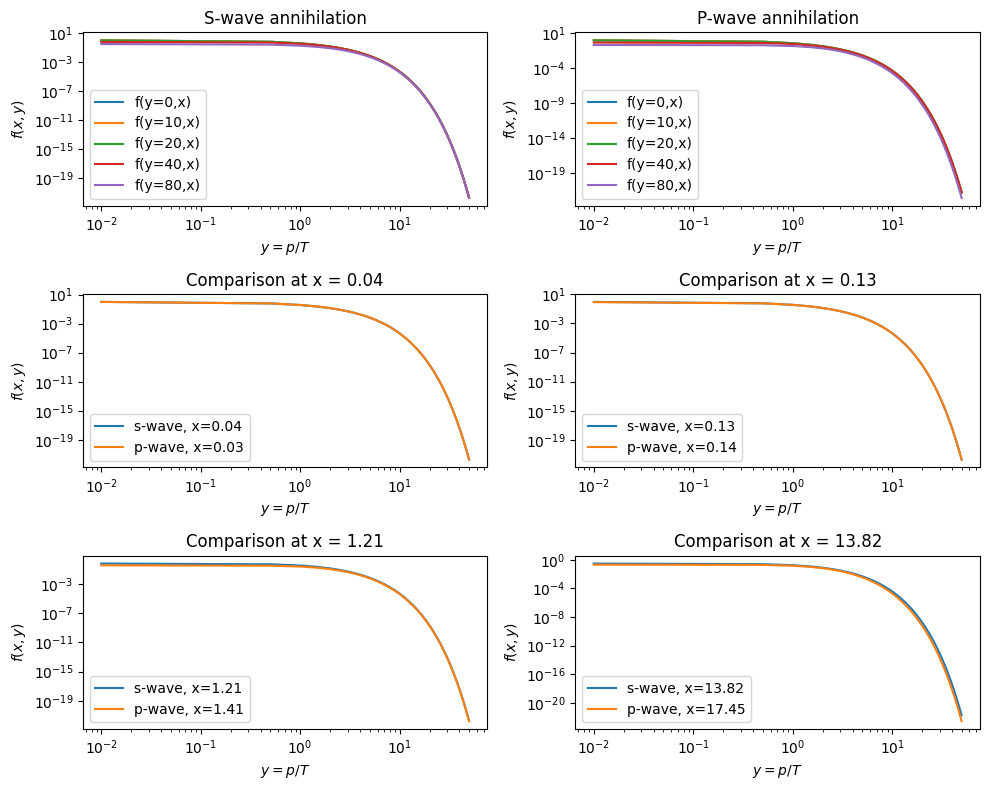

In [18]:
# solve for annihilation with initial condition = full thermal equilibrium
solv = solver(x_span,y_span,equilibrium,s_annihilation)
xs0 = solv[0]
ys0 = solv[1]    
fs0 = solv[2]
# print(len(xs))

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
for n in [0,10,20,40,80]:
    axs[0,0].loglog(ys0,fs0[:,n],label=f"f(y={n},x)")
axs[0,0].set_xlabel(r"$y = p/T$")
axs[0,0].set_ylabel (r"$f(x,y)$")
axs[0,0].set_title("S-wave annihilation")
axs[0,0].legend()

solv = solver(x_span,y_span,equilibrium,p_annihilation)
xs1 = solv[0]
ys1 = solv[1]    
fs1 = solv[2]
for n in [0,10,20,40,80]:
    axs[0,1].loglog(ys1,fs1[:,n],label=f"f(y={n},x)")
axs[0,1].set_xlabel(r"$y = p/T$")
axs[0,1].set_ylabel (r"$f(x,y)$")
axs[0,1].set_title("P-wave annihilation")
axs[0,1].legend()

indicies = [[10,20],[40,80]]

for i in range(1,3):
    for j in range(0,2):
        index = indicies[i-1][j]
        axs[i,j].loglog(ys0,fs0[:,index], label=f"s-wave, x={xs0[index]:0.2f}")
        axs[i,j].loglog(ys1,fs1[:,index+7], label=f"p-wave, x={xs1[index+7]:0.2f}")
        axs[i,j].set_title(f"Comparison at x = {xs0[index]:0.2f}")
        axs[i,j].set_xlabel(r"$y = p/T$")
        axs[i,j].set_ylabel (r"$f(x,y)$")
        axs[i,j].legend()

fig.tight_layout()

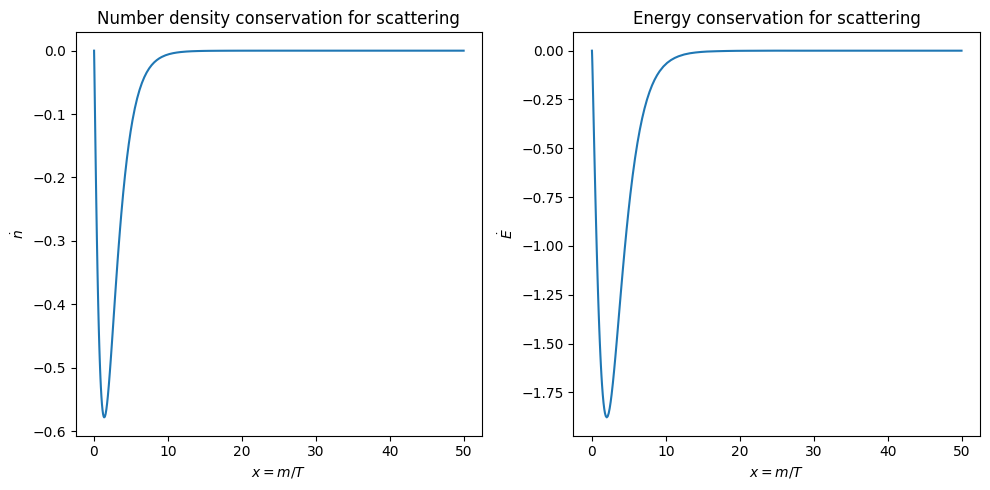

In [19]:
energy_cons = energy_conservation(x_span,y_span,equilibrium)

n_dot = energy_cons[0]
E_dot = energy_cons[1]
xs = energy_cons[2]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i in [0,1]:
    axs[i].plot(xs,energy_cons[i])
    axs[i].set_xlabel(r"$x = m/T$")
axs[0].set_title("Number density conservation for scattering")
axs[0].set_ylabel(r"$\dot{n}$")
axs[1].set_title("Energy conservation for scattering")
axs[1].set_ylabel(r"$\dot{E}$")

fig.tight_layout()